In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/Colab Notebooks/Paddy Segmentation'

/content/drive/My Drive/Colab Notebooks/Paddy Segmentation


In [10]:
!pip install rasterio

     |████████████████████████████████| 15.1MB 6.4MB/s 


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pprint
import rasterio

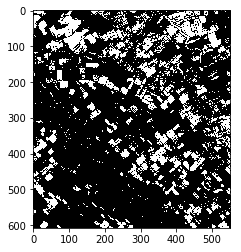

In [4]:
a = cv2.imread('Output/predict_mask.tif')
a= a*255
plt.imshow(a)

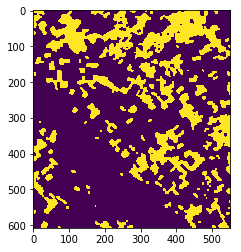

In [5]:
 f = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

closing = cv2.morphologyEx(f, cv2.MORPH_CLOSE, kernel3)
for i in range(5):
    closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel2)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel2)
del closing
for i in range(5):
    opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel2)
input_img = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel3)


plt.imshow(input_img)
# print(input_img)
# print(a.shape)

In [0]:
profiles = []
with rasterio.open('Input/img.tif') as src:
        profile = src.profile
        profile.update(
            dtype=rasterio.uint8,
            count=1,
            compress='lzw')
with rasterio.open('Output/post-processed_predict_mask.tif','w',**profile) as dst:
        dst.write(input_img.astype(np.uint8), indexes=1)